<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorial/00_lowlevel/LinearModel_using_tf_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()

### Linear Model
$$
f(W, b, x) = W  x + b
$$
If you training $W$ and $b$ from data $x$, you should  use `tf.variable` to declare `W` and `b` in python.

In [0]:
class Model(object):
    def __init__(self):
        # Initialize variable to (5.0, 0.0)
        # In practice, these should be initialized to random values.
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b

model = Model()

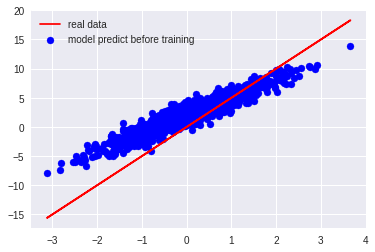

In [19]:
## toy_data
## Note that you never know TRUE_W and TRUE_b practically.

TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

plt.scatter(inputs.numpy(), outputs.numpy(), c='b')
plt.plot(inputs, model(inputs), c='r')
plt.legend(['real data', 'model predict before training'])

### Loss
We use L2 loss to train our model $f(W, b, x)$. When we have training data $D = \{(x_1, y_1), ..., (x_N, y_N) \}$, the L2 loss is writen below.

$$
{\rm Loss}(W, b, x, y) = \sum_{i=1}^N (f(W, b, x_i) - y_i)^2
$$

In [0]:
def loss(model, x, desired_y):
    predicted_y = model(x)
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

### training

We are going to training $W$ and $b$ while $x$ and $y$ is observed data (= constant), so we often let ${\rm Loss}(W, b, x, y)$ to ${\rm Loss}(W, b)$.Gradient Descent method to W and b are writen below.

$$
\begin{align}
W &\leftarrow W - \epsilon \frac{\partial {\rm Loss}(W, b)}{\partial W} \\\
b &\leftarrow b - \epsilon \frac{\partial {\rm Loss}(W, b)}{\partial b}
\end{align}
$$

This method is very simple and widely used in machine learning, especially Neural Networks.

In [0]:
def train(model, inputs, outputs, learning_rate):
    ## When you use auto differential, 
    ## Memorize calucration graph using tf.GradientTape
    with tf.GradientTape() as t:
        current_loss = loss(model, inputs, outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.69871
Epoch  1: W=4.61 b=0.40, loss=5.93151
Epoch  2: W=4.30 b=0.71, loss=4.15794
Epoch  3: W=4.05 b=0.97, loss=3.02121
Epoch  4: W=3.85 b=1.17, loss=2.29264
Epoch  5: W=3.69 b=1.33, loss=1.82567
Epoch  6: W=3.57 b=1.46, loss=1.52636
Epoch  7: W=3.46 b=1.57, loss=1.33452
Epoch  8: W=3.38 b=1.65, loss=1.21155
Epoch  9: W=3.31 b=1.72, loss=1.13274


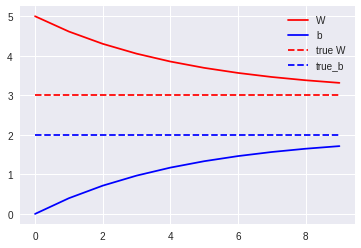

In [22]:
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model, inputs, outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()


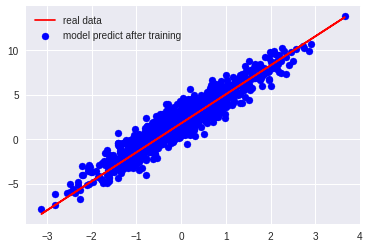

In [23]:
plt.scatter(inputs.numpy(), outputs.numpy(), c='b')
plt.plot(inputs, model(inputs), c='r')
plt.legend(['real data', 'model predict after training'])